# 6. Climatology and Anomaly

To start climate analysis, we often start from analyzing **climatology** and **anomaly**. 

## Calculate monthly climatology and anomaly with `groupby`

In [1]:
import numpy as np
import pandas as pd
import xarray as xr 
from cartopy import crs as ccrs   
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib as mpl
from matplotlib import pyplot as plt
import cmaps 

mpl.rcParams['figure.dpi'] = 100

# Spatial and temporal range parameters
lats = -20
latn =  30
lon1 =  79 
lon2 = 161
time1 = '2017-12-01'
time2 = '2017-12-31'

# Open file
olr_ds = xr.open_dataset("data/olr.nc") 
# Long term data to calculate climatology
olr = (olr_ds.sel(time=slice('1998-01-01','2016-12-31'),
                    lat=slice(lats,latn),
                    lon=slice(lon1,lon2)).olr)
# Real time period for anomaly.
olrrt = (olr_ds.sel(time=slice('2017-12-01','2017-12-31'),
                    lat=slice(lats,latn),
                    lon=slice(lon1,lon2)).olr)


In Unit 4, we learned how to conditionally control datetime objects using xarray. Similarly, we group and calculate the mean of dates within the same month based on the datetime accessor `time.month` to obtain the monthly climatology. To group by the same months, we use the xarray function `groupby`.

In [2]:
olrGB = olr.groupby("time.month")
olrMonClim = olrGB.mean("time")  # The `mean` here is to mean over the same group, not mean over the entire period. 
olrMonClim

<xarray.DataArray 'olr' (month: 12, lat: 50, lon: 82)> Size: 197kB
array([[[270.46295, 270.73306, 270.65665, ..., 257.25116, 256.66913,
         255.88489],
        [269.24954, 268.8672 , 269.106  , ..., 253.44594, 253.16605,
         252.61195],
        [267.06573, 267.1016 , 267.57956, ..., 249.2561 , 248.4184 ,
         247.00945],
        ...,
        [257.9647 , 257.92267, 258.25693, ..., 256.99442, 256.7958 ,
         257.13882],
        [253.88763, 253.44121, 252.49252, ..., 252.67389, 252.67776,
         252.66585],
        [245.34576, 240.01846, 228.33456, ..., 248.6515 , 248.66846,
         248.49454]],

       [[266.90402, 267.24286, 267.5611 , ..., 255.47618, 254.07542,
         253.18782],
        [264.35098, 264.7394 , 264.88358, ..., 251.78017, 251.39395,
         251.59004],
        [261.4748 , 262.0324 , 262.23868, ..., 247.40343, 248.10788,
         248.63504],
...
        [281.75525, 281.8884 , 282.38974, ..., 263.41367, 263.98563,
         264.8334 ],
        [279.72992, 279.606  , 276.21063, ..., 257.44904, 258.60928,
         259.01102],
        [270.86935, 264.80884, 252.717  , ..., 252.37294, 253.24257,
         254.25145]],

       [[277.6884 , 277.96237, 278.4138 , ..., 268.97833, 268.33752,
         267.38034],
        [276.88388, 276.72455, 277.11646, ..., 267.85056, 267.2011 ,
         266.11264],
        [274.72495, 274.7343 , 275.10522, ..., 266.41324, 264.9135 ,
         264.2871 ],
        ...,
        [269.02094, 269.55533, 270.47006, ..., 258.97546, 259.5016 ,
         260.03702],
        [266.66284, 267.0835 , 265.3553 , ..., 253.46599, 253.83995,
         254.14189],
        [258.7794 , 254.24706, 243.16267, ..., 248.40625, 248.42702,
         248.41463]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 328B 79.5 80.5 81.5 82.5 ... 157.5 158.5 159.5 160.5
  * lat      (lat) float32 200B -19.5 -18.5 -17.5 -16.5 ... 26.5 27.5 28.5 29.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    standard_name:  toa_outgoing_longwave_flux
    long_name:      NOAA Climate Data Record of Daily Mean Upward Longwave Fl...
    units:          W m-2
    cell_methods:   time: mean area: mean

Similarly, anomalies are obtained by grouping the real-time data using `groupby` and then subtracting the climatology. The `groupby` function identifies corresponding month groups.

In [3]:
olra = olrrt.groupby('time.month').mean('time') - olrMonClim
olra

<xarray.DataArray 'olr' (month: 1, lat: 50, lon: 82)> Size: 16kB
array([[[ 9.78241   ,  9.909576  ,  8.493408  , ...,  2.497589  ,
          1.3457642 , -0.74990845],
        [ 8.7960205 ,  9.101654  ,  9.233459  , ...,  0.71640015,
         -0.6616211 , -2.1523438 ],
        [ 7.6419373 ,  9.022461  , 10.015717  , ...,  1.4698181 ,
         -0.83166504, -3.696045  ],
        ...,
        [-6.5422363 , -5.305298  , -6.9757385 , ..., 10.722809  ,
         12.269043  , 13.60672   ],
        [-5.522644  , -5.337219  , -5.0463257 , ...,  7.494705  ,
          8.71553   ,  9.534042  ],
        [-5.712723  , -4.6646423 , -4.2814636 , ...,  4.3125763 ,
          5.6015167 ,  6.79834   ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 328B 79.5 80.5 81.5 82.5 ... 157.5 158.5 159.5 160.5
  * lat      (lat) float32 200B -19.5 -18.5 -17.5 -16.5 ... 26.5 27.5 28.5 29.5
  * month    (month) int64 8B 12

We plot the anomaly field.

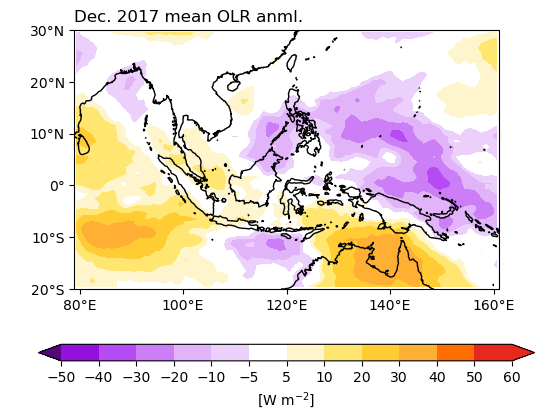

In [4]:
from matplotlib import pyplot as plt
from cartopy import crs as ccrs   
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmaps

proj = ccrs.PlateCarree() 
fig,ax = plt.subplots(1,1,subplot_kw={'projection':proj}) 
clevs = [-50,-40,-30,-20,-10,-5,5,10,20,30,40,50,60]
olrPlot = (olra[0,:,:]
               .plot.contourf("lon", "lat",              
                              transform=proj,     
                              ax=ax,            
                              levels=clevs,      
                              cmap=cmaps.sunshine_diff_12lev,     
                              add_colorbar=True,  
                              extend='both',  
                              cbar_kwargs={'orientation': 'horizontal', 'aspect': 30, 'label': r'[W m$^{-2}$]', 'ticks':clevs}) 
                              )

ax.set_extent([lon1,lon2,lats,latn],crs=proj)
ax.set_xticks(np.arange(80,180,20), crs=proj)
ax.set_yticks(np.arange(-20,40,10), crs=proj)   
lon_formatter = LONGITUDE_FORMATTER
lat_formatter = LATITUDE_FORMATTER   
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)  
ax.coastlines()                                              
ax.set_ylabel(' ')             
ax.set_xlabel(' ')
plt.title(' ')
plt.title("Dec. 2017 mean OLR anml.", loc='left')  
plt.show()

## Calculate daily climatology and anomaly

Similar to monthly climatology, we can group the data by `time.dayofyear` to calculate daily climatology. 

In [5]:
olrGB = olr.groupby("time.dayofyear")
olrDayClim = olrGB.mean("time")

olra = olrrt.groupby('time.dayofyear') - olrDayClim

olra

<xarray.DataArray 'olr' (time: 31, lat: 50, lon: 82)> Size: 508kB
array([[[ 15.122101  ,  16.334747  ,  13.599518  , ..., -60.50157   ,
         -79.51955   , -72.87891   ],
        [ 21.117798  ,  19.827057  ,  18.036926  , ..., -60.637543  ,
         -67.54944   , -56.39473   ],
        [ 23.31018   ,  22.088013  ,  21.162445  , ..., -54.980927  ,
         -57.3517    , -61.343475  ],
        ...,
        [ 16.104095  ,  17.379211  ,  15.227692  , ...,  19.058502  ,
          20.518616  ,  17.546478  ],
        [ 10.698151  ,   9.565765  ,   9.262024  , ...,  15.9817505 ,
          16.922485  ,  15.873199  ],
        [  9.011963  ,  10.09436   ,   7.46196   , ...,  25.99179   ,
          22.395844  ,  24.516144  ]],

       [[ 10.832916  ,  11.870026  ,  11.048401  , ...,   7.759735  ,
           3.9926758 , -11.958023  ],
        [ 18.722748  ,  18.02127   ,  16.30832   , ...,  18.752747  ,
          -9.488678  , -19.771454  ],
        [ 29.749542  ,  28.71933   ,  23.702057  , ...,  26.725952  ,
          -5.3364563 , -18.360504  ],
...
        [ 20.139404  ,  17.60962   ,  10.017822  , ...,   1.2883606 ,
          -2.5752106 , -10.758987  ],
        [ 23.506165  ,  20.85086   ,  14.741516  , ...,  -2.9874268 ,
          -4.8914337 ,  -7.4083557 ],
        [ 22.266754  ,  16.122147  ,  13.668915  , ...,   2.6325684 ,
          -4.155838  ,  -3.736206  ]],

       [[ 17.165894  ,  26.317688  ,  26.874603  , ...,  -6.727722  ,
           8.582062  ,   5.428833  ],
        [ 24.211151  ,  29.262146  ,  28.295624  , ...,  -4.6532288 ,
          11.954285  ,  14.010925  ],
        [ 26.614563  ,  29.69284   ,  28.318512  , ...,   7.863983  ,
          19.585327  ,  25.504883  ],
        ...,
        [ 18.78122   ,  14.21608   ,  10.089493  , ...,  12.241455  ,
          12.811462  ,  19.498688  ],
        [ 19.803665  ,  17.64177   ,   8.04245   , ...,  13.380524  ,
          18.12529   ,  19.97647   ],
        [ 16.37706   ,  11.906448  ,   9.84053   , ...,  12.811996  ,
          11.387054  ,  10.267792  ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 248B 2017-12-01 2017-12-02 ... 2017-12-31
  * lon        (lon) float32 328B 79.5 80.5 81.5 82.5 ... 158.5 159.5 160.5
  * lat        (lat) float32 200B -19.5 -18.5 -17.5 -16.5 ... 27.5 28.5 29.5
    dayofyear  (time) int64 248B 335 336 337 338 339 340 ... 361 362 363 364 365

## Calculate "Smooth" Annual Cycle

The smooth annual cycle is calculated to preserve the first *n* harmonic cycles using the Fast Fourier Transform (FFT) method. To perform FFT, we need to use the `scipy` library. Below is a function adapted from NCAR Command Language (NCL) to calculate the smooth annual cycle. The function requires the unsmoothed annual cycle (`clmDay=olrDayClim` from the above example) and the number of harmonic cycles `nHarm`. 


In [6]:
from scipy.fft import rfft, irfft

def smthClmDay(clmDay, nHarm):
    nt, ny, nx = clmDay.shape
    cf = rfft(clmDay.values, axis=0)     # xarray.DataArray.values: convert to numpy.ndarray first. 
    cf[nHarm,:,:] = 0.5*cf[nHarm,:,:]    # mini-taper.
    cf[nHarm+1:,:,:] = 0.0               # set all higher coef to 0.0
    icf = irfft(cf, n=nt, axis=0)       # reconstructed series
    clmDaySmth = clmDay.copy(data=icf, deep=False)  
    return(clmDaySmth)

olrDayClim_sm = smthClmDay(olrDayClim, 3)
olrDayClim_sm

<xarray.DataArray 'olr' (dayofyear: 366, lat: 50, lon: 82)> Size: 6MB
array([[[273.80515, 274.10938, 274.2879 , ..., 261.79456, 260.9497 ,
         259.96237],
        [272.50845, 272.31113, 272.69553, ..., 259.65186, 259.05936,
         258.1859 ],
        [270.22046, 270.31717, 270.83304, ..., 256.96295, 255.90952,
         254.99857],
        ...,
        [260.15997, 260.5604 , 261.29028, ..., 257.65775, 257.77252,
         258.23932],
        [256.91174, 257.18832, 256.1388 , ..., 252.47044, 252.64952,
         252.72314],
        [249.13118, 244.76389, 233.80005, ..., 247.78957, 247.84799,
         247.76076]],

       [[273.66   , 273.9643 , 274.14062, ..., 261.48926, 260.66068,
         259.6891 ],
        [272.35568, 272.1524 , 272.53165, ..., 259.30475, 258.74103,
         257.90274],
        [270.05838, 270.1501 , 270.6593 , ..., 256.57834, 255.56288,
         254.67543],
...
        [260.96295, 261.39435, 262.1524 , ..., 257.77435, 257.91214,
         258.39255],
        [257.76877, 258.06982, 256.98972, ..., 252.51714, 252.7237 ,
         252.81175],
        [249.98839, 245.61041, 234.62175, ..., 247.77896, 247.85405,
         247.79373]],

       [[273.94824, 274.25226, 274.4333 , ..., 262.10028, 261.2389 ,
         260.23553],
        [272.65866, 272.46793, 272.85754, ..., 259.9982 , 259.3765 ,
         258.46808],
        [270.37982, 270.48196, 271.00443, ..., 257.34586, 256.2545 ,
         255.32027],
        ...,
        [260.5534 , 260.96948, 261.71365, ..., 257.7139 , 257.84018,
         258.31378],
        [257.33243, 257.6214 , 256.55753, ..., 252.49162, 252.68436,
         252.76512],
        [249.55336, 245.18178, 234.20656, ..., 247.78218, 247.84875,
         247.7748 ]]], dtype=float32)
Coordinates:
  * lon        (lon) float32 328B 79.5 80.5 81.5 82.5 ... 158.5 159.5 160.5
  * lat        (lat) float32 200B -19.5 -18.5 -17.5 -16.5 ... 27.5 28.5 29.5
  * dayofyear  (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 361 362 363 364 365 366
Attributes:
    standard_name:  toa_outgoing_longwave_flux
    long_name:      NOAA Climate Data Record of Daily Mean Upward Longwave Fl...
    units:          W m-2
    cell_methods:   time: mean area: mean

We compare the smoothed and unsmoothed climatology time series over the Australia monsoon region (115˚-150˚E, 2˚-15˚S). 

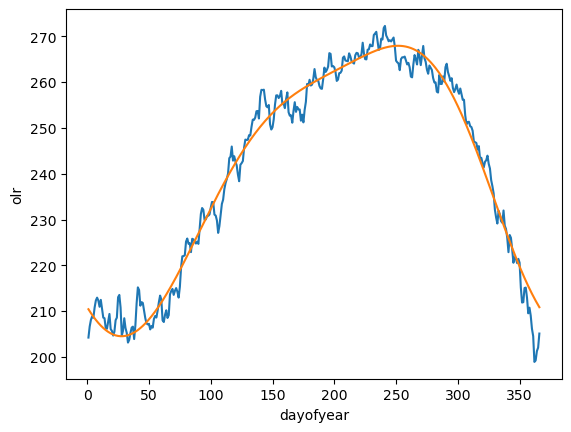

In [7]:
plt.figure()                   
lp = (olrDayClim.sel(lon=slice(115,150),lat=slice(-15,-2))
                .mean(["lat","lon"])
                .plot.line(x="dayofyear"))
lp_sm = (olrDayClim_sm.sel(lon=slice(115,150),lat=slice(-15,-2))
                      .mean(["lat","lon"])
                      .plot.line(x="dayofyear"))
plt.show()

The x-axis is the day of year and the y-axis is the OLR values. The blue curve is the unsmoothed annual cycle, and the orange curve is the smoothed annual cycle by preserving the first three harmonics. 